# Convolutional Neural Networks (image and video recognition, recommender systems and nlp)

### CNN - Handwritten Digit Recognition

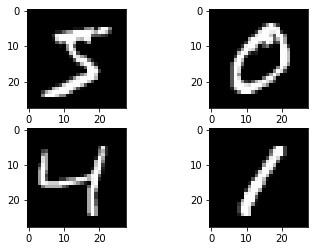

In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

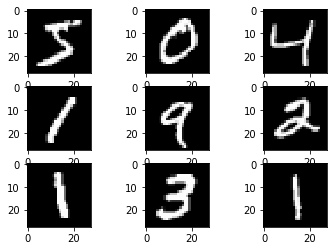

In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

### Multi-Layer Perceptron Model using MNIST

In [10]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2782 - acc: 0.9211 - val_loss: 0.1409 - val_acc: 0.9586
Epoch 2/10
 - 7s - loss: 0.1124 - acc: 0.9668 - val_loss: 0.0914 - val_acc: 0.9714
Epoch 3/10
 - 7s - loss: 0.0725 - acc: 0.9796 - val_loss: 0.0808 - val_acc: 0.9759
Epoch 4/10
 - 7s - loss: 0.0516 - acc: 0.9849 - val_loss: 0.0743 - val_acc: 0.9776
Epoch 5/10
 - 7s - loss: 0.0377 - acc: 0.9894 - val_loss: 0.0638 - val_acc: 0.9806
Epoch 6/10
 - 7s - loss: 0.0276 - acc: 0.9926 - val_loss: 0.0653 - val_acc: 0.9800
Epoch 7/10
 - 7s - loss: 0.0225 - acc: 0.9940 - val_loss: 0.0623 - val_acc: 0.9803
Epoch 8/10
 - 7s - loss: 0.0144 - acc: 0.9969 - val_loss: 0.0581 - val_acc: 0.9814
Epoch 9/10
 - 7s - loss: 0.0117 - acc: 0.9974 - val_loss: 0.0551 - val_acc: 0.9817
Epoch 10/10
 - 7s - loss: 0.0089 - acc: 0.9980 - val_loss: 0.0586 - val_acc: 0.9816
Baseline Error: 1.84%


### Convolutional Neural Network Model using MNIST

In [17]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras import backend as K

K.set_image_dim_ordering('th')

seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) 
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 106s - loss: 0.2248 - acc: 0.9356 - val_loss: 0.0780 - val_acc: 0.9760
Epoch 2/10
 - 104s - loss: 0.0708 - acc: 0.9787 - val_loss: 0.0449 - val_acc: 0.9851
Epoch 3/10
 - 105s - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0431 - val_acc: 0.9857
Epoch 4/10
 - 109s - loss: 0.0385 - acc: 0.9882 - val_loss: 0.0398 - val_acc: 0.9873
Epoch 5/10
 - 115s - loss: 0.0320 - acc: 0.9901 - val_loss: 0.0337 - val_acc: 0.9889
Epoch 6/10
 - 110s - loss: 0.0265 - acc: 0.9918 - val_loss: 0.0312 - val_acc: 0.9895
Epoch 7/10
 - 104s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0365 - val_acc: 0.9885
Epoch 8/10
 - 109s - loss: 0.0189 - acc: 0.9944 - val_loss: 0.0317 - val_acc: 0.9894
Epoch 9/10
 - 111s - loss: 0.0152 - acc: 0.9952 - val_loss: 0.0310 - val_acc: 0.9896
Epoch 10/10
 - 112s - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0316 - val_acc: 0.9895
Baseline Error: 1.05%


# Large CNN Using MNIST

In [18]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras import backend as K

K.set_image_dim_ordering('th')

seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


def baseline_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), padding='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 101s - loss: 0.3867 - acc: 0.8819 - val_loss: 0.0882 - val_acc: 0.9723
Epoch 2/10
 - 98s - loss: 0.0989 - acc: 0.9703 - val_loss: 0.0544 - val_acc: 0.9825
Epoch 3/10
 - 97s - loss: 0.0733 - acc: 0.9771 - val_loss: 0.0430 - val_acc: 0.9860
Epoch 4/10
 - 101s - loss: 0.0601 - acc: 0.9819 - val_loss: 0.0374 - val_acc: 0.9876
Epoch 5/10
 - 96s - loss: 0.0513 - acc: 0.9840 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 6/10
 - 97s - loss: 0.0445 - acc: 0.9855 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 7/10
 - 98s - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0299 - val_acc: 0.9901
Epoch 8/10
 - 100s - loss: 0.0361 - acc: 0.9887 - val_loss: 0.0267 - val_acc: 0.9909
Epoch 9/10
 - 97s - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0243 - val_acc: 0.9925
Epoch 10/10
 - 99s - loss: 0.0306 - acc: 0.9905 - val_loss: 0.0268 - val_acc: 0.9913
Baseline Error: 0.87%
